## Logistic Regression:
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1). 

The sigmoid function, f(z)=(1/1+e^-z) is used to bring the predicted values between the range of (0,1), a threshold value is set ,usually at 0.5 with which the prediction of classes are executed.

To Know more about [logistic regression]:(https://www.javatpoint.com/logistic-regression-in-machine-learning)

## Binary Classification:

It is a classification problem in which the response categorical variable contains two categories/classes

ex:yes/no ,pass/fail, male/female etc..

In [1]:
##importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\ronal\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ronal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ronal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
##reading the dataframe
df=pd.read_csv(r'D:\BDA 2020 assignments\py-master\ML\7_logistic_reg\Exercise\HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [6]:
## average number of all columns
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

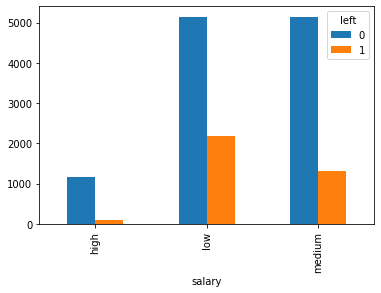

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

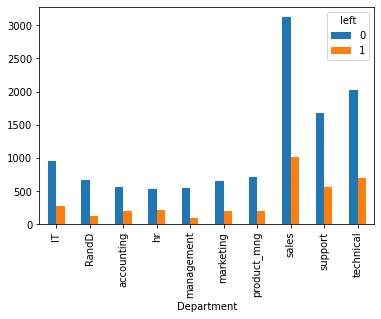

In [8]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

## let's choose the following variales as independent variables
### salary
### satisfaction level
### average_monthly hours
### promotion_last_year

In [9]:
subdf=df[['salary','satisfaction_level','average_montly_hours','promotion_last_5years']]
subdf

,salary,satisfaction_level,average_montly_hours,promotion_last_5years
0,low,0.38,157,0
1,medium,0.80,262,0
2,medium,0.11,272,0
3,low,0.72,223,0
4,low,0.37,159,0
...,...,...,...,...
14994,low,0.40,151,0
14995,low,0.37,160,0
14996,low,0.37,143,0
14997,low,0.11,280,0


In [10]:
salary_dummies=pd.get_dummies(df['salary'])
final=pd.concat([subdf,salary_dummies],axis='columns')
final



,salary,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,low,0.38,157,0,0,1,0
1,medium,0.80,262,0,0,0,1
2,medium,0.11,272,0,0,0,1
3,low,0.72,223,0,0,1,0
4,low,0.37,159,0,0,1,0
...,...,...,...,...,...,...,...
14994,low,0.40,151,0,0,1,0
14995,low,0.37,160,0,0,1,0
14996,low,0.37,143,0,0,1,0
14997,low,0.11,280,0,0,1,0


In [11]:
final=final.drop(['salary','medium'],axis='columns')


In [18]:
x=final
x

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low
0,0.38,157,0,0,1
1,0.80,262,0,0,0
2,0.11,272,0,0,0
3,0.72,223,0,0,1
4,0.37,159,0,0,1
...,...,...,...,...,...
14994,0.40,151,0,0,1
14995,0.37,160,0,0,1
14996,0.37,143,0,0,1
14997,0.11,280,0,0,1


x=final
x

In [13]:
y=df.left

In [14]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [15]:
##splitting the dataset into train and test

from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [20]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [21]:
reg.fit(x_train,y_train)

LogisticRegression()

In [25]:
ypredict=reg.predict(x_test)
len(ypredict)

1500

In [26]:
ypredict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [28]:
## accuracy of the model
reg.score(x_test,y_test)

0.7666666666666667

## Multiclass classification using iris dataset:

A classification task in which the response variable contains more than two clases or categories

ex: child/teen/adult ,low/medium/high

In [5]:
from sklearn.datasets import load_iris

In [8]:
iris=load_iris()


In [11]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
type(iris)

sklearn.utils.Bunch

In [25]:
iris.target[1:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
iris.data[2]

array([4.7, 3.2, 1.3, 0.2])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2)

In [32]:
len(x_train)

120

In [33]:
len(x_test)

30

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [38]:
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
model.score(x_test,y_test)

0.9666666666666667

In [57]:
y_predicted=model.predict(x_test)
iris.target_names[y_predicted]

array(['setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica'],
      dtype='<U10')

In [58]:
iris.target_names[iris.target[6]]

'setosa'

In [77]:
iris.target_names[0:3]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [72]:
model.predict([iris.data[6]]) #predicts setosa which is correct

array([0])

In [78]:
## let's visualise the errors
from sklearn.metrics import confusion_matrix

In [80]:
cm=confusion_matrix(y_test,y_predicted)

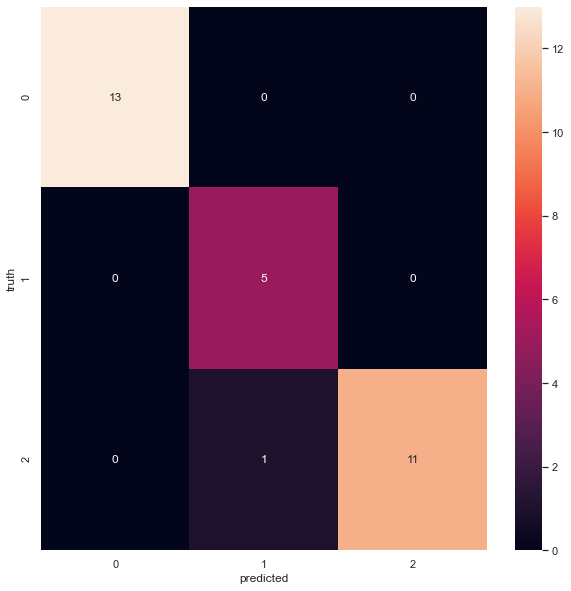

In [90]:
import seaborn as sns 
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")
sns.set(rc={"figure.figsize":(100,10)})

## The titanic dataset :


The titanic dataset is one of the popular datasets to practice a multiclass classification task in the below datafram only 'Pclass', 'Sex', 'Age', 'Fare' are considered as the independednt or predictor variables for ease of understanding. ,

In [30]:
titanic=pd.read_csv(r'D:\BDA 2020 assignments\py-master\ML\9_decision_tree\Exercise\titanic.csv',usecols=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'])

In [31]:
titanic

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [32]:
sex_dummy=pd.get_dummies(titanic["Sex"])
sex_dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
titanic=pd.concat([titanic,sex_dummy],axis='columns')
titanic.drop(['male','Sex'],axis='columns',inplace=True)


In [34]:
titanic

,Survived,Pclass,Age,Fare,female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
...,...,...,...,...,...
886,0,2,27.0,13.0000,0
887,1,1,19.0,30.0000,1
888,0,3,NaN,23.4500,1
889,1,1,26.0,30.0000,0


In [35]:
titanic.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
female        0
dtype: int64

In [36]:
titanic.Age.median()

28.0

In [37]:
titanic.Age.mean()

29.69911764705882

In [44]:
titanic.Age.value_counts(ascending=False).head(1)

24.0    30
Name: Age, dtype: int64

In [47]:
titanic.Age=titanic.Age.fillna(24)

In [48]:
titanic.isna().sum()

Survived    0
Pclass      0
Age         0
Fare        0
female      0
dtype: int64

In [49]:
predictor=titanic.drop('Survived',axis='columns')

In [63]:
predictor

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
888,3,24.0,23.4500,1
889,1,26.0,30.0000,0


In [50]:
target=titanic.Survived


In [64]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [51]:
predictor.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(predictor,target,test_size=0.1)

In [58]:
x_train.shape

(801, 4)

In [59]:
len(x_test)

90

In [60]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [61]:
model.fit(predictor,target)

LogisticRegression()

In [62]:
model.score(x_test,y_test)

0.7555555555555555